# STAT 306 Group Project #

## Introduction

In [1]:
# Importing necessary libraries
library(tidyverse)
library(dplyr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Reading the dataset
data <- read.csv("student-mat.csv", header = TRUE, sep = ";")
#head(data)

In [3]:
# Wrangling the dataset
data <- data |>
    rename(final_grade = G3) |> # Renaming G3 to final_grade
    select(-school, -G1, -G2)

# Filtering the data to exclude rows where final_grade = 0
filtered_data <- data %>% filter(final_grade > 0)
head(filtered_data)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,⋯,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,F,18,U,GT3,A,4,4,at_home,teacher,course,⋯,no,no,4,3,4,1,1,3,6,6
2,F,17,U,GT3,T,1,1,at_home,other,course,⋯,yes,no,5,3,3,1,1,3,4,6
3,F,15,U,LE3,T,1,1,at_home,other,other,⋯,yes,no,4,3,2,2,3,3,10,10
4,F,15,U,GT3,T,4,2,health,services,home,⋯,yes,yes,3,2,2,1,1,5,2,15
5,F,16,U,GT3,T,3,3,other,other,home,⋯,no,no,4,3,2,1,2,5,4,10
6,M,16,U,LE3,T,4,3,services,other,reputation,⋯,yes,no,5,4,2,1,2,5,10,15


In [4]:
#Checking missing values
sum(is.na(data))

[1] 0

## Exploratory Data Analysis

In [5]:
# Identifying the variables
categorical_vars <- c("sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", 
                      "age", "Medu", "Fedu", "traveltime", "studytime", "failures", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health")

# Choosing the response variable (e.g., G3)
response_var <- "final_grade"

# Creating boxplots for categorical variables
boxplots <- lapply(categorical_vars, function(var) {
  ggplot(data, aes_string(x = var, y = response_var)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle(paste("Boxplot of", response_var, "by", var))
})

# Combining all the plots
all_plots <- c(boxplots)

scatterplot <- ggplot(data, aes(x = absences, y = final_grade)) +
    geom_point(alpha = 0.7) +
    ggtitle(paste("Scatterplot of", response_var, "vs absences"))


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


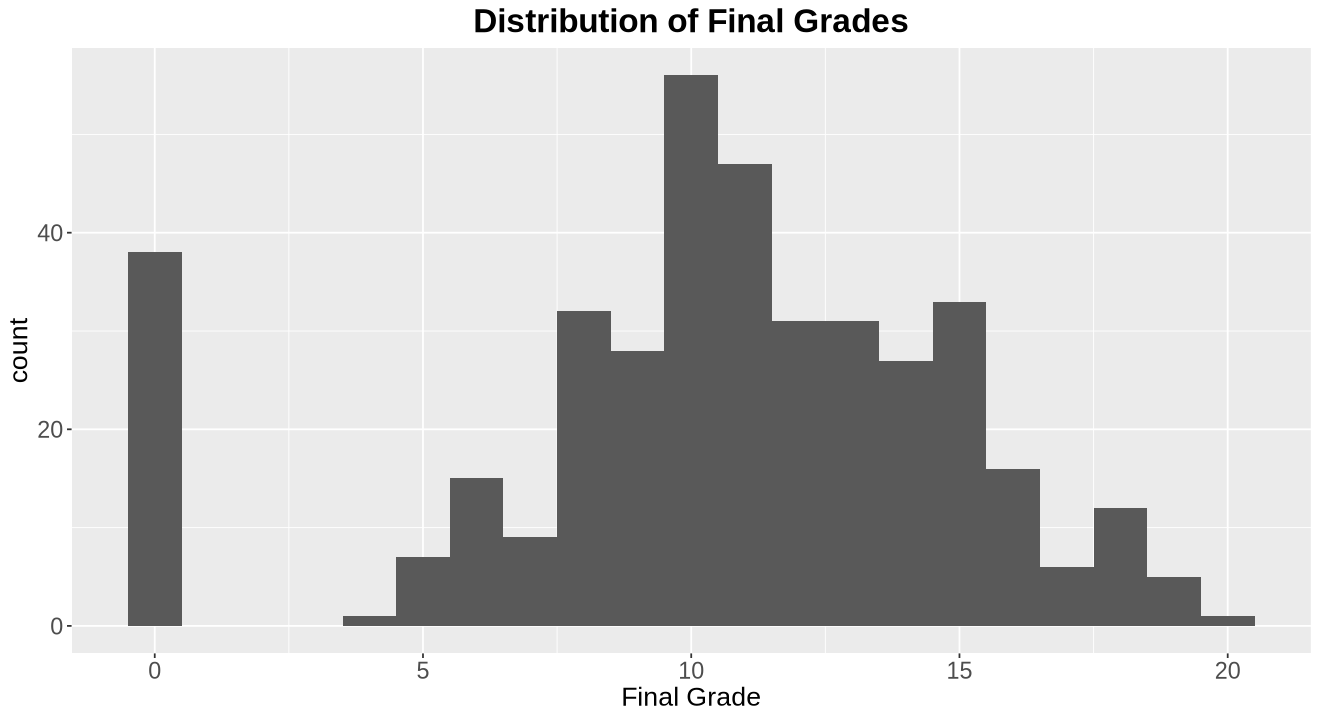

In [6]:
# Creating a histogram to visualize the distribution of grades
options(repr.plot.width = 11, repr.plot.height = 6)
students_grade_dist <- data %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 1) + 
    labs(x = "Final Grade",
        title = "Distribution of Final Grades") +
theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"), # Center title and increase size 
        axis.title = element_text(size = 16), # Increase axis label text size 
        axis.text = element_text(size = 14))
students_grade_dist

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


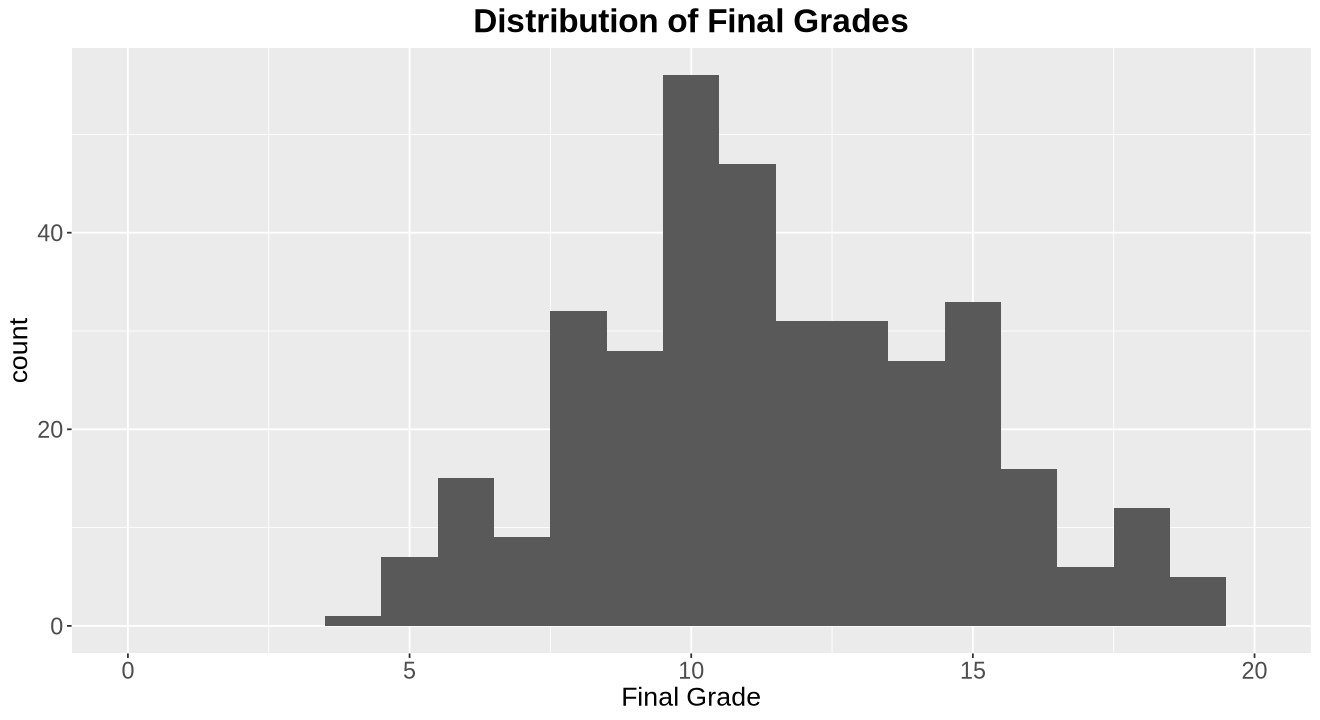

In [7]:
# Create a histogram to visualize the distribution of grades without 0
options(repr.plot.width = 11, repr.plot.height = 6)
students_grade_dist_new <- data %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 1) + 
    scale_x_continuous(limits = c(0,20)) +
    labs(x = "Final Grade",
        title = "Distribution of Final Grades") +
theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"), # Center title and increase size 
        axis.title = element_text(size = 16), # Increase axis label text size 
        axis.text = element_text(size = 14))
students_grade_dist_new

## Fitting Linear Model: Multiple Linear Regression

In [8]:
#Selecting variables 
data_selected <- data |>
    select(-famsize, -Pstatus, -reason, -famsup, -paid, -activities, -nursery, -romantic, -absences)

#Filtering data to exclude 0
filtered_data <- data_selected %>%
  filter(final_grade != 0)

#Fitting linear model
linear_model <- lm(final_grade ~. , data = filtered_data)
summary <- summary(linear_model)
summary


Call:
lm(formula = final_grade ~ ., data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8079 -1.8833 -0.1467  1.8142  7.3336 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    16.247026   3.099737   5.241 2.85e-07 ***
sexM            0.891723   0.342971   2.600 0.009743 ** 
age            -0.283129   0.145005  -1.953 0.051721 .  
addressU        0.499867   0.401267   1.246 0.213752    
Medu            0.049563   0.223392   0.222 0.824558    
Fedu            0.098209   0.195567   0.502 0.615882    
Mjobhealth      1.341178   0.795669   1.686 0.092821 .  
Mjobother      -0.373530   0.523551  -0.713 0.476070    
Mjobservices    0.904500   0.584606   1.547 0.122777    
Mjobteacher    -0.610941   0.741913  -0.823 0.410839    
Fjobhealth     -0.866157   1.013623  -0.855 0.393441    
Fjobother      -0.807027   0.747956  -1.079 0.281388    
Fjobservices   -0.828518   0.775951  -1.068 0.286418    
Fjobteacher     1.209382   0.93494

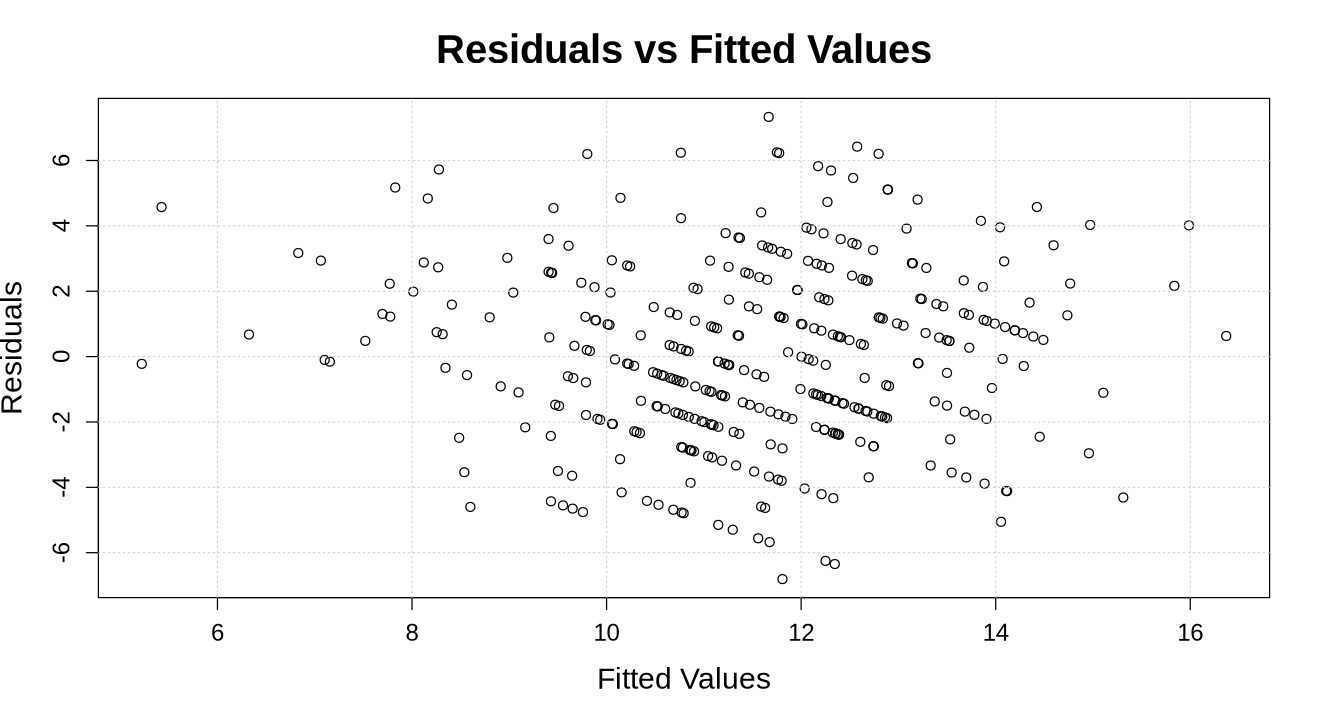

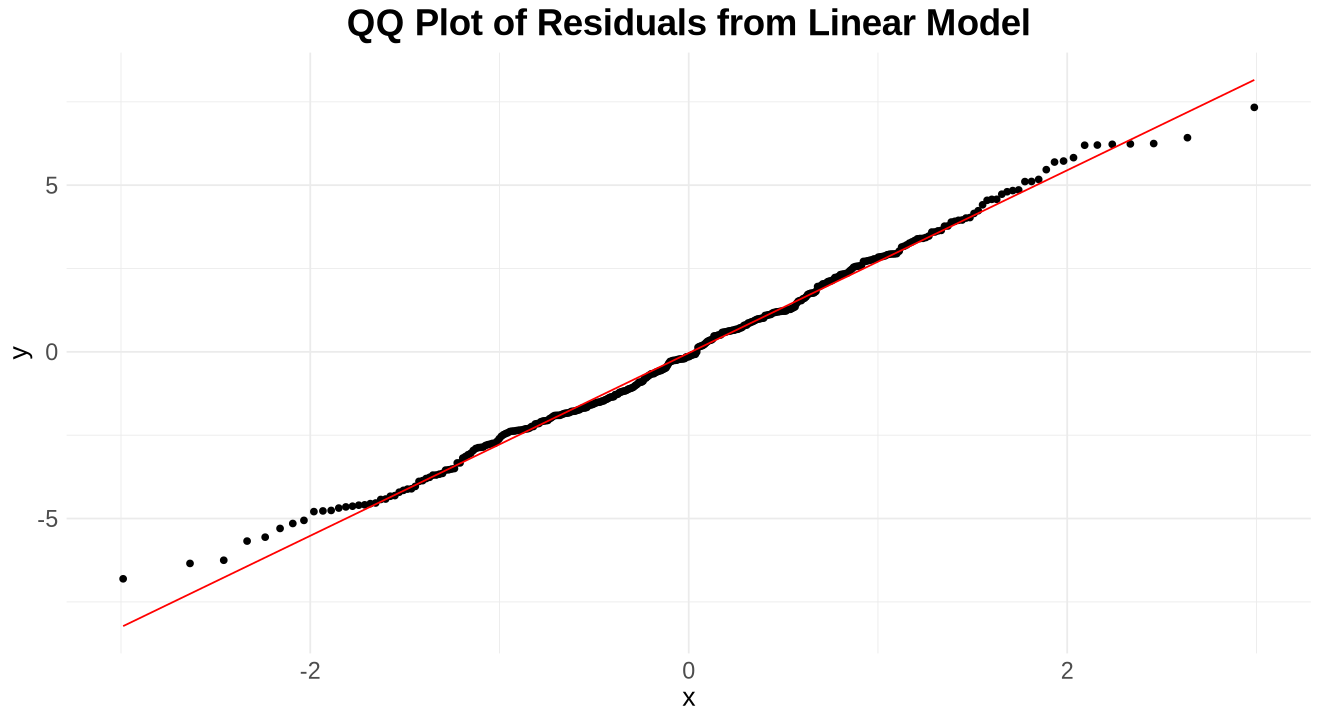

In [9]:
# Plotting residual plot
plot(linear_model$fitted.values, linear_model$residuals,
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs Fitted Values", 
     cex.lab = 1.5, # Increase label text size 
     cex.axis = 1.2,
     cex.main = 2) # Increase axis text size
grid()

library(ggplot2)
residuals_df <- data.frame(Residuals = residuals(linear_model))
ggplot(residuals_df, aes(sample=Residuals)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  ggtitle("QQ Plot of Residuals from Linear Model") +
  theme_minimal() + 
  theme(plot.title = element_text(hjust = 0.5, size = 22, face = "bold"), # Center title and increase size 
        axis.title = element_text(size = 16), # Increase axis label text size 
        axis.text = element_text(size = 14)) # Increase axis text size

## Analysis : Best Subset Selection

In [10]:
# Importing necessary libraries
options(repos = c(CRAN = "https://cran.r-project.org"))
library(leaps)
library(dplyr)

# Applying best selection on dataset
best_selection <- regsubsets(
  x =  final_grade ~ ., nvmax = 26 ,
  data = filtered_data,
  method = "exhaustive"
)

best_selection_summary <- summary(best_selection)
best_selection_summary

ERROR: Error in library(leaps): there is no package called ‘leaps’


In [ ]:
# Best selection summary table
n_vars <- length(best_selection_summary$rsq)

best_selection_summary_df <- tibble(
    n_input_variables = 1:n_vars,
    RSQ = best_selection_summary$rsq,
    ADJ.R2 = best_selection_summary$adjr2,
    Cp = best_selection_summary$cp,
)

best_selection_summary_df

In [ ]:
library(dplyr)

# Setting undesired levels to NA
final_filtered_data <- filtered_data %>%

  mutate(Mjob = ifelse(Mjob %in% c("other"), NA, Mjob),
         Fjob = ifelse(Fjob %in% c("health", "other", "services"), NA, Fjob))

# Checking the levels after modification
levels(filtered_data$Mjob)
levels(filtered_data$Fjob)

# Fitting the linear model without having to exclude levels explicitly in the formula
reduced_linear_model <- lm(final_grade ~ sex + Mjob + Fjob + studytime + failures + schoolsup + goout, 
            data = filtered_data
                          )

summary(reduced_linear_model)